In [ ]:
# conda env monte-prob

# 몬테카를로 시뮬레이션으로 배우는 확률 통계 (추정)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3,2)

## MME

### 감마 분포를 따르는 x_list에 대해서 alpha, beta 추정하기

In [2]:
import numpy as np

def moment(x_list, k):
    n = len(x_list)
    sum_xk = 0
    for x in x_list:
        sum_xk += x**k
    res = sum_xk/n
    return res


true_alpha = 3
true_beta = 2
x_list = np.random.gamma(shape=true_alpha, scale=true_beta, size=10000)

moment1 = moment(x_list, 1)
moment2 = moment(x_list, 2)

alpha_hat = (moment1**2)/(moment2-moment1**2)
print(f'true_alpha={true_alpha}, estimated = {alpha_hat}')

beta_hat = (moment2 - moment1**2)/moment1
print(f'true_beta={true_beta}, estimated = {beta_hat}')

true_alpha=3, estimated = 3.0721914745763295
true_beta=2, estimated = 1.9602302394580642


## MLE

#### 38경기 중 27승을 한 데이터가 주어졌을 때, 데이터가 관측될 (최대) 확률 추정

MLE prob = 0.1414931297689555, p = 0.71


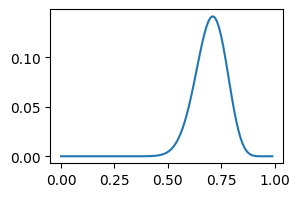

In [3]:
from scipy.stats import binom
import numpy as np

def draw_likelihood(n, x):
    
    p_list = np.arange(0, 1, 0.01)
    
    probs = []
    for p in p_list:
        prob = binom.pmf(k=x, n=n, p=p)
        probs.append(prob)
        
    max_prob_idx = np.argmax(probs)
    max_prob = probs[max_prob_idx]
    print(f'MLE prob = {max_prob}, p = {p_list[max_prob_idx]}')
    
    plt.plot(p_list, probs)
    plt.show()
    
draw_likelihood(n=38,  x=27)

## MAP

### prior : beta, likelihood : binomial

MAP prob = 0.15648747931274903, max_p = 0.6400000000000003


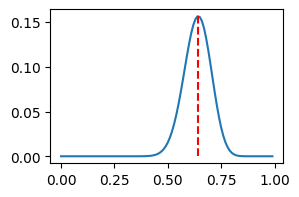

In [14]:
def seq(start, stop, step):
    res = []
    current = start
    while current < stop:
        res.append(current)
        current += step
    return res

def factorial(x):
    x_list = list(range(1,x+1))
    res = 1
    for val in x_list:
        res *= val
    return res

def combination(n, x):
    res = factorial(n) / (factorial(x)*factorial(n-x))
    return res


def gamma_function(alpha, x):
    e = 2.7182818284
    res = (x**(alpha-1)*(e**(-x)))
    return res

def gamma(alpha):
    a = 0
    b = 100
    x_list = seq(a+0.0001, b, 0.001)
    
    gamma_list = []
    for x in x_list:
        y = gamma_function(alpha, x)
        gamma_list.append(y)
    res = ((b-a)/len(x_list)*sum(gamma_list))
    return res


def draw_map(n, x):
    
    alpha = 10
    beta = 10
        
    p_list = seq(0, 1, 0.01)
    post_probs = []
    for p in p_list:
        beta_function = gamma(alpha+beta) / (gamma(alpha)*gamma(beta))
        prior_prob = beta_function * (p**(alpha-1)) * ((1-p)**(beta-1))
        likelihood = combination(n, x) * (p**x) * ((1-p)**(n-x))
        post_prob = likelihood * prior_prob
        post_probs.append(post_prob)

    max_prob = max(post_probs)
    max_idx = post_probs.index(max_prob)
    max_p = p_list[max_idx]    
    
    print(f'MAP prob = {max_prob}, max_p = {p_list[max_idx]}')
    
    plt.plot(p_list, post_probs)
    plt.vlines(max_p, 0, max_prob, color="red", linestyle="--")
    plt.show()


draw_map(n=38, x=27)